In [779]:
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
import torchvision
import os
import math
import matplotlib.pyplot as py
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, SubsetRandomSampler ,Dataset
import torch.nn.functional as F

In [791]:
class ccpdataset(Dataset):
    def __init__(self):
        self.xy=pd.read_excel('C:\\Users\\mohit\\Desktop\\ANN\\data.xlsx')
        x=self.xy.iloc[1:47840, 0:4].values
        y=self.xy.iloc[1:47840, 4].values
        self.x_train=torch.tensor(x,dtype=torch.float32)
        self.y_train=torch.tensor(y)
    def __len__(self):
        return len(self.y_train)
    def __getitem__(self,index):
        return self.x_train[index],self.y_train[index]

In [797]:
dataset=ccpdataset()
train_sampler=SubsetRandomSampler(list(range(40000)))
valid_sampler=SubsetRandomSampler(list(range(5000)))
test_sampler=SubsetRandomSampler(list(range(8000)))
tr_dataloader = DataLoader(dataset=dataset, batch_size=500,sampler=train_sampler, num_workers=0)
v_dataloader = DataLoader(dataset=dataset, batch_size=500, sampler=valid_sampler)
t_dataloader = DataLoader(dataset=dataset, sampler=test_sampler)
tr_data=next(iter(tr_dataloader))
v_data=next(iter(v_dataloader))
t_data=next(iter(t_dataloader))
print(tr_dataloader)

features, labels = tr_data
lables=torch.LongTensor(lables)

In [798]:
class ANN_model(nn.Module):
    def __init__(self,input_features=4,hidden1=15 ,hidden2=15,hidden3=15,output_features=500):
        super().__init__()
        self.fc1=nn.Linear(input_features,hidden1)
        self.fc2=nn.Linear(hidden1,hidden2)
        self.fc3=nn.Linear(hidden2,hidden3)
        self.out=nn.Linear(hidden3,output_features)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.out(x)
        return x

In [799]:
torch.manual_seed(15)
model=ANN_model()

In [800]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.002)

In [801]:
epochs=15
epoch=0
losses=[]
for epoch in range(epochs) :
    epoch=epoch+1
    for i,(inputs,label) in enumerate (tr_dataloader):
        y_pred=model.forward(inputs)
        loss=loss_function(y_pred,label.type(torch.FloatTensor))
        print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss=loss.detach().cpu().numpy()
        losses.append(loss)

c:\users\mohit\appdata\local\programs\python\python37\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 500])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(208138.4688, grad_fn=<MseLossBackward0>)
tensor(205937.0312, grad_fn=<MseLossBackward0>)
tensor(205469.8906, grad_fn=<MseLossBackward0>)
tensor(203255., grad_fn=<MseLossBackward0>)
tensor(202767.4375, grad_fn=<MseLossBackward0>)
tensor(200868.8906, grad_fn=<MseLossBackward0>)
tensor(199046.4688, grad_fn=<MseLossBackward0>)
tensor(199290.6875, grad_fn=<MseLossBackward0>)
tensor(196032.9375, grad_fn=<MseLossBackward0>)
tensor(194353.6562, grad_fn=<MseLossBackward0>)
tensor(192840.5000, grad_fn=<MseLossBackward0>)
tensor(191359.8281, grad_fn=<MseLossBackward0>)
tensor(189176.7344, grad_fn=<MseLossBackward0>)
tensor(185879.5000, grad_fn=<MseLossBackward0>)
tensor(183099.3438, grad_fn=<MseLossBackward0>)
tensor(180308.3750, grad_fn=<MseLossBackward0>)
tensor(175599.5312, grad_fn=<MseLossBackward0>)
tensor(173078.2500, grad_fn=<MseLossBackward0>)
tensor(168320.3750, grad_fn=<MseLossBackward0>)
tensor(163397.2344, grad_fn=<MseLossBackward0>)
tensor(159528.1875, grad_fn=<MseLossBackward

271.1737


Text(0.5, 0, 'iter')

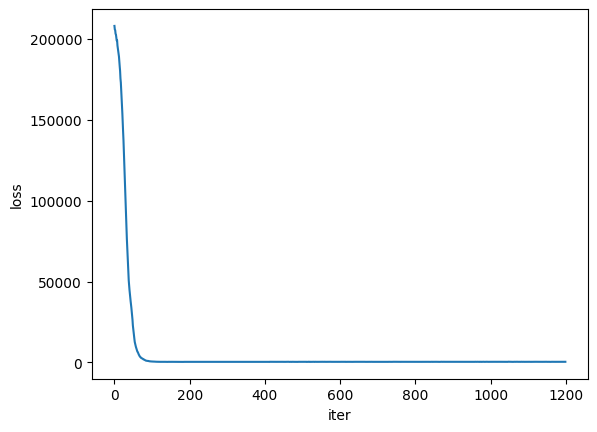

In [803]:
%matplotlib inline
print(min(losses))
py.plot(range(1200),losses)
py.ylabel('loss')
py.xlabel('iter')

In [804]:
pred=[]
with torch.no_grad():
    for i,(inputs,label) in enumerate(t_dataloader):
        y=model.forward(inputs)
        y=np.array(y)
        ##print(y[:,499:])
        pred.append(y[:,499:])


In [805]:
from sklearn.metrics import precision_score
lab=[]
for i,(inputs,label) in enumerate(t_dataloader):
    label=label.item()
    lab.append(label)
sum=0
for i in range(568):
    per=abs(lab[i]-pred[i])*100/lab[i]
    sum=sum+per
print('error=',sum[0][0]/569,'%')

error= 4.431832419128955 %
